# Correlation Analysis

## Imports

In [1]:
import sys 
sys.path.append('../scripts')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
from sklearn.preprocessing import MinMaxScaler
from bokeh.models import Slope
from bokeh.palettes import Sunset10
from bokeh.plotting import figure, show

from scripts.helpers import get_graph_from_pickle, merge_graph_to_df

In [3]:
df_origin = pd.read_csv('../data/processed/preprocessed.csv', index_col=0)
df_origin.set_index('wikipedia_id', inplace=True)
print(df_origin.shape)
df_origin.head(5)

(22394, 9)


,name,release_year,rating,num_votes,plot,freebase_id,languages,countries,genres
wikipedia_id,,,,,,,,,
10109752,Miss Jerry,1894.0,5.3,207,After finding out that her father is suffering...,/m/02q23xk,['Silent film'],['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-..."
28703057,The Corbett-Fitzsimmons Fight,1897.0,5.3,484,The film no longer exists in its entirety; how...,/m/0czdh_n,[],[],['Sports']
142995,The Story of the Kelly Gang,1906.0,6.0,855,The Story of the Kelly Gangs tone is of sorrow...,/m/0120y4,['English Language'],['Australia'],"['Crime Fiction', 'Silent film', 'Biography', ..."
32986669,Robbery Under Arms,1907.0,4.3,25,Key scenes of the film included the branding o...,/m/04p7yxx,['Silent film'],['Australia'],"['Silent film', 'Drama']"
32987200,"Captain Midnight, the Bush King",1911.0,5.4,18,Edgar Dalimore is the son of wealthy station o...,/m/0h569x9,['Silent film'],[],['Silent film']


In [4]:
list_year = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

dfs = {}  # Dictionary to store the dataframes

for year in list_year:
    G = get_graph_from_pickle(year)
    df_year = merge_graph_to_df(df_origin, G) 
    df_year.drop(columns=['languages','plot','countries', 'freebase_id'], inplace=True)
    dfs[f"{year}"] = df_year

# Access the dataframes using dfs["df_year"]
df_all = pd.concat(dfs.values())



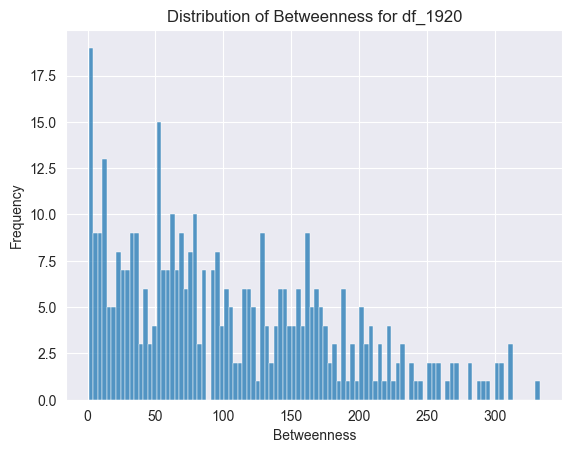

In [5]:
#let's look at the degree distribution 
sns.histplot(data=dfs["1920"], x="degree", bins=100)
plt.xlabel("Betweenness")
plt.ylabel("Frequency")
plt.title("Distribution of Betweenness for df_1920")
plt.show()


In [7]:
nb = 0
for df in dfs:
    nb += dfs[df].shape[0]
print(nb)
display(df_all.shape)

22237


(22237, 7)

In [11]:
dfs

{'1920':                                  name  release_year  rating  num_votes  \
 28776744        The Amateur Gentleman        1920.0     4.0         14   
 11396051                  L'Atlantide        1921.0     6.7        419   
 32932657  The Breaking of the Drought        1920.0     5.2         27   
 8691806                   The Flapper        1920.0     6.4        412   
 9862787                       Genuine        1920.0     5.9       1105   
 ...                               ...           ...     ...        ...   
 36821133           Loetoeng Kasaroeng        1926.0     7.3         12   
 32943041     When the Kellys Were Out        1923.0     6.8         10   
 32896307                      Sunrise        1926.0     7.9        210   
 26032146   The Passaic Textile Strike        1926.0     5.6         44   
 36381869            Resia Boroboedoer        1928.0     7.1         12   
 
                                                      genres   betweenness  \
 28776744   

In [13]:
# Here we scale the betweenness and degree columns for all the dataframes independently for each decade and for the whole dataset 
scaler = MinMaxScaler()
for df in dfs:
    df_used = dfs[df]
    df_used[['betweenness', 'degree']] = scaler.fit_transform(df_used[['betweenness', 'degree']])
    dfs[df] = df_used
df_all[['betweenness', 'degree']] = scaler.fit_transform(df_all[['betweenness', 'degree']])


In [14]:
correlation = df_all['rating'].corr(df_all['betweenness'])
print(correlation)


-0.047931894918632346


In [15]:
corelation_dict_betweenness = {}
corelation_dict_degree = {}
for df in dfs:
    df_used = dfs[df]
    corelation_dict_betweenness[df] = df_used['rating'].corr(df_used['betweenness'])
    corelation_dict_degree[df] = df_used['rating'].corr(df_used['degree'])

print(corelation_dict_betweenness)
print(corelation_dict_degree)
print("all_together",correlation)

{'1920': -0.14980510924214005, '1930': -0.08693292794997934, '1940': -0.10840846061176301, '1950': -0.09105008522517877, '1960': -0.10207376032339342, '1970': -0.1169016378067017, '1980': -0.09280056337195602, '1990': -0.11406677635716941, '2000': -0.12075565725983195, '2010': -0.08683447051183114}
{'1920': -0.07602537957913663, '1930': -0.014150670687271088, '1940': -0.0832597572058336, '1950': -0.07457622485583172, '1960': -0.06648332340489099, '1970': -0.12138958949490916, '1980': -0.1041277719613301, '1990': -0.11957685303100055, '2000': -0.13500622341485208, '2010': -0.14275511929520682}
all_together -0.047931894918632346


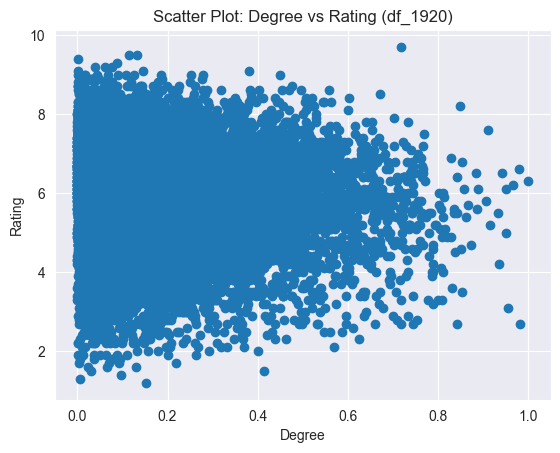

In [16]:
plt.scatter(df_all['degree'], df_all['rating'])
plt.xlabel('Degree')
plt.ylabel('Rating')
plt.title('Scatter Plot: Degree vs Rating (df_1920)')
plt.show()
df_fig = df_all[df_all.release_year >= 2010]


In [22]:
df_fig = df_all[df_all.release_year >= 2010]
df_fig

,name,release_year,rating,num_votes,genres,betweenness,degree
27852285,The Final Journey,2010.0,8.9,11,['Documentary'],0.010598,0.027546
9873472,Quantum Quest: A Cassini Space Odyssey,2010.0,5.1,441,"['Science Fiction', 'Family Film', 'Adventure'...",0.000155,0.010149
25178358,The Wicker Tree,2011.0,3.8,2881,"['Cult', 'Mystery', 'Horror', 'Drama', 'Thrill...",0.003468,0.070315
20991625,In My Sleep,2010.0,5.5,2126,"['Thriller', 'Psychological thriller', 'Myster...",0.007178,0.084088
28245273,On the Road,2012.0,6.0,42934,"['Drama', 'Adventure']",0.082618,0.160565
...,...,...,...,...,...,...,...
35203478,Breaking News,2012.0,5.8,14,"['Comedy film', 'Satire']",0.009700,0.077021
35457037,Bikram Singha: The Lion Is Back,2012.0,6.0,70,['Action'],0.019819,0.145161
32038154,Kadhayile Nayika,2011.0,4.2,11,['Family Film'],0.010668,0.088438
33599927,"With Love, Delhi!",2011.0,8.8,31,"['Crime Fiction', 'Thriller']",0.000046,0.015042


In [30]:
from scipy.stats import linregress
res = linregress(df_fig.degree, df_fig.rating)

In [31]:
from bokeh.plotting import figure, from_networkx, curdoc

curdoc().theme = 'light_minimal'

xpts = df_fig['rating']
ypts =df_fig['degree']

blue, yellow = Sunset10[0], Sunset10[5]

p = figure(
    sizing_mode='stretch_width', height=600, 
    toolbar_location=None,
    x_axis_label='degree',
    y_axis_label='rating',
    background_fill_color="#fafafa"
)
p.y_range.start = 0

p.circle(df_fig['degree'], df_fig['rating'], size=8, alpha=0.8, fill_color=yellow, line_color="black")

slope = Slope(gradient=res.slope, y_intercept=res.intercept,
              line_color=blue, line_dash='dashed', line_width=4)


p.add_layout(slope)

# show(p)

from bokeh.plotting import output_file, save
output_file('<name>.html')
save(plot)